# AIE Workshop - Julia for Computational Modelling
## Part 2: Neural networks with `Flux.jl`

- **Speaker**: Fabricio Oliveira 
- **Contact**: fabricio.oliveira@aalto.fi | [gamma-opt.aalto.fi](https://gamma-opt.aalto.fi/)

### Example 1: MNIST

Let's start from a simple example and develop a simple fully connected neural network for predicting digits using the MNIST dataset.

In [1]:
using Flux 
using BSON          # for saving trained model
using MLDatasets    # interface for common ML datasets; BSON is 
using MLUtils       # For data manipulation
using Surrogates    # For sampling

using LinearAlgebra, Random, Statistics, Plots, Images
Random.seed!(1);

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] 


This gives us an idea of the sizes of our preset train and test splits.

In [2]:
x_train_raw, y_train_raw = MNIST(split=:train)[:] 
x_test_raw, y_test_raw = MNIST(split=:test)[:]

@show summary(x_train_raw)
@show summary(x_test_raw);

This program has requested access to the data dependency MNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of MNIST aren't really
explicit about any terms of use, so please read the
website to make sure you want to download the
dataset.



Do you want to download the dataset from ["https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz", "https://ossci-datasets.s3.amazonaws.com/mn

stdin>  y


summary(x_train_raw) = "28×28×60000 Array{Float32, 3}"
summary(x_test_raw) = "28×28×10000 Array{Float32, 3}"


Let's have a look at some examples of our data

labels =  [5, 0, 4, 1, 9]


,,,,

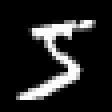
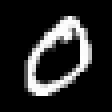
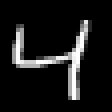
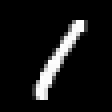
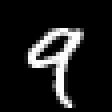

In [3]:
println("labels =  $(y_train_raw[1:5])") 
img = [x_train_raw[:, :, i]' |> colorview(Gray) for i=1:5]  # or use convert2image()

Preparing the data to input our network. Simply means flattening the image to a vector and doing a one-hot encoding of the classes

In [4]:
x_train = Flux.flatten(x_train_raw) # single input layer
x_test = Flux.flatten(x_test_raw)   #

size(x_train) # 28 x 28 = 784

(784, 60000)

In [5]:
y_train = Flux.onehotbatch(y_train_raw, 0:9)
y_test = Flux.onehotbatch(y_test_raw, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

Now `Flux.jl` really start to show its role. We will startt by defining our model. We choose a very simple fully connected (i.e., `Dense`) network with ReLU activation layers. At the very end, we input a softmax to decide on the classification.

In [6]:
model_MLP = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 128, relu),
    Dense(128, 64, relu),
    Dense(64, 10),
    softmax
)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 128, relu),               # 4_224 parameters
  Dense(128 => 64, relu),               # 8_256 parameters
  Dense(64 => 10),                      # 650 parameters
  NNlib.softmax,
)                   # Total: 8 arrays, 38_250 parameters, 149.820 KiB.

In `Flux.jl` we have the freedom to define whatever we want as our loss function. Notice we simply used the readly available `Flux.crossentropy`, but we could have defined our own rather trivially.

In [7]:
# sqnorm(x) = sum(abs2, x)
loss(model, x, y) = Flux.crossentropy(model(x), y) #+ sum(sqnorm, Flux.params(model))


# Showcasing equivalence in function definiton while pretting-up things
function calculate_loss(model, data)
    return loss(model, data[1][1], data[1][2])
end

calculate_loss (generic function with 1 method)

Setting up the optimiser to be used in the training. 

In [8]:
η = 0.001 # learning rate
opt = Flux.setup(ADAM(η), model_MLP)

(layers = ((weight = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (0.9, 0.999))), σ = ()), (weight = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam(eta=0.001, beta=(0.9, 0.999), epsilon=1.0e-8), (Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 

epoch=1 : train_loss=2.3074534
epoch=11 : train_loss=1.963738
epoch=21 : train_loss=1.2889464
epoch=31 : train_loss=0.71591747
epoch=41 : train_loss=0.49009207
epoch=51 : train_loss=0.39186984
epoch=61 : train_loss=0.33563453
epoch=71 : train_loss=0.29902962
epoch=81 : train_loss=0.27181882
epoch=91 : train_loss=0.24970095
epoch=101 : train_loss=0.2313138
epoch=111 : train_loss=0.21583246
epoch=121 : train_loss=0.2026872
epoch=131 : train_loss=0.19142064
epoch=141 : train_loss=0.18162245
epoch=151 : train_loss=0.17290995
epoch=161 : train_loss=0.16497207
epoch=171 : train_loss=0.15762046
epoch=181 : train_loss=0.1507196
epoch=191 : train_loss=0.14419638


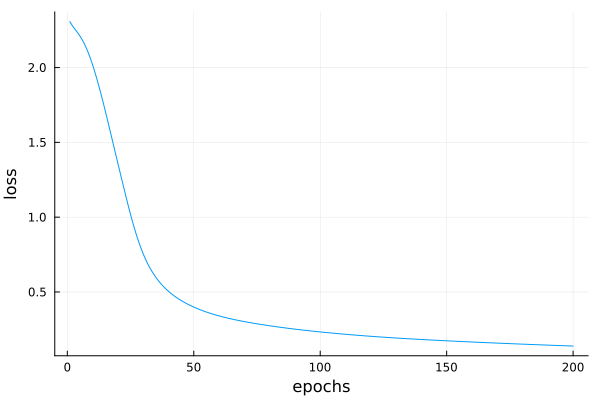

In [9]:
train_data = [(x_train, y_train)]
loss_progression = []
epochs = 200

# Main training loop
for epoch in 1:epochs
   Flux.train!(loss, model_MLP, train_data, opt)  # Tensorflow style training. 
    
    # Logging; you can use @withprogress from ProgressLogging.jl instead  
    l = calculate_loss(model_MLP, train_data)
    push!(loss_progression, l)
    if mod(epoch, 10) == 1  
        println("epoch=$epoch : train_loss=$l")
    end
end

plot(loss_progression, xlabel = "epochs", ylabel = "loss", legend=false)

In [67]:
BSON.@save "mlp_model.bson" model_MLP

In [68]:
BSON.@load "mlp_model.bson" model_MLP

Let's implement a function to calculate our accuracy on the test set

In [10]:
function calculate_accuracy(model, x, y)
    y_hat = model(x)
    iscorrect = Flux.onecold(y_hat) .== Flux.onecold(y)         # onecold is the inverse of onehot encoding
    return accuracy = round(100 * mean(iscorrect); digits=2)
end

calculate_accuracy(model_MLP, x_test, y_test)

95.3

Let's look as some exemplars in the test set and see how well our model does

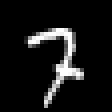

In [11]:
index = 42
img = x_test_raw[:, :, index]' |> colorview(Gray) 

In [12]:
prediction = model_MLP(x_test[:,index])
println("Recognised digit: ", Flux.onecold(prediction, 0:9))
println("Digit label: ", y_test_raw[index])  

Recognised digit: 7
Digit label: 7


## Example 2 - CIFAR10 with CNNs

Let's try something a bit more sophisticated. Our main urpose is to showcase a few more standard yet more advanced features from `Flux.jl`

In [13]:
using MLDatasets: CIFAR10
using .Iterators # Packages from Base have this .

I am using Julia's native `Iterators.jl` to batch my training data into 1000 datapoints batches. If you need more sophisticated data loaders, say due to memory limitations or too large datasets, consider `Flux.DataLoader()`

In [14]:
train_x, train_y = CIFAR10(split=:train)[:]
labels = Flux.onehotbatch(train_y, 0:9)

train_data = ([(train_x[:,:,:,i], labels[:,i]) for i in partition(1:49000, 1000)])

validaton_set = 49001:50000
validation_x = train_x[:,:,:,validaton_set]
validation_y = labels[:, validaton_set]

This program has requested access to the data dependency CIFAR10.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: The CIFAR-10 dataset
Authors: Alex Krizhevsky, Vinod Nair, Geoffrey Hinton
Website: https://www.cs.toronto.edu/~kriz/cifar.html
Reference: https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

[Krizhevsky, 2009]
    Alex Krizhevsky.
    "Learning Multiple Layers of Features from Tiny Images",
    Tech Report, 2009.

The CIFAR-10 dataset is a labeled subsets of the 80
million tiny images dataset. It consists of 60000
32x32 colour images in 10 classes, with 6000 images
per class.

The compressed archive file that contains the
complete dataset is available for download at the
offical website linked above; specifically the binary
version for C programs. Note that using the data
responsibly and respecting copyright remains your
responsibility. The authors of CIFAR-10 aren't really
explicit about an

stdin>  y



7-Zip (a) [64] 17.04 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.04 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,12 CPUs 12th Gen Intel(R) Core(TM) i7-1255U (906A4),ASM,AES-NI)


Extracting archive: 
--
Path = 
Type = tar
Code Page = UTF-8

Everything is Ok

Folders: 1
Files: 8
Size:       184380149
Compressed: 9216


10×1000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  1  1
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅

Labeled class: (2 => "bird")


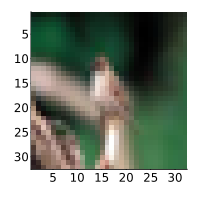

In [39]:
index = rand(1:49000) 
image(x) = colorview(RGB, permutedims(x, (3, 2, 1)))

classes = (
    0 => "airplane",
    1 => "automobile",
    2 => "bird",
    3 => "cat",
    4 => "deer",
    5 => "dog",
    6 => "frog",
    7 => "horse",
    8 => "ship",
    9 => "truck"
)

println("Labeled class: ($(classes[train_y[index] + 1]))")

plot(image(train_x[:,:,:,index]), size = (200,200))


Here is our model. Now we use a few convolution layers before inputting it into a set of dense layers

In [15]:
CNN_model = Chain(
  Conv((5,5), 3=>16, relu),
  MaxPool((2,2)),
  Conv((5,5), 16=>8, relu),
  MaxPool((2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(200, 120),
  Dense(120, 84),
  Dense(84, 10),
  softmax)

Chain(
  Conv((5, 5), 3 => 16, relu),          # 1_216 parameters
  MaxPool((2, 2)),
  Conv((5, 5), 16 => 8, relu),          # 3_208 parameters
  MaxPool((2, 2)),
  var"#5#6"(),
  Dense(200 => 120),                    # 24_120 parameters
  Dense(120 => 84),                     # 10_164 parameters
  Dense(84 => 10),                      # 850 parameters
  NNlib.softmax,
)                   # Total: 10 arrays, 39_558 parameters, 155.328 KiB.

Setting up the loss, the optimisation method we will use and an accuracy measure so we can log it during training.

In [17]:
loss(x, y, model) = sum(Flux.crossentropy(model(x), y))
accuracy(x, y, model) = mean(Flux.onecold(model(x), 0:9) .== Flux.onecold(y, 0:9))

accuracy (generic function with 1 method)

In [29]:
using Flux: params, update!

epochs = 15
opt = Flux.setup(Momentum(0.01), CNN_model)

# This takes about 1 min per epoch on my 2019 Macbook pro M1
for epoch = 1:epochs
  for d in train_data
    lo, gs = Flux.withgradient(CNN_model) do m# "with respect to"
      y_pred = m(d[1])
      return Flux.crossentropy(y_pred, d[2])
    end
    Flux.update!(opt, CNN_model, gs[1])
  end
  println("epoch $(epoch) finished. acc.: $(accuracy(validation_x, validation_y, CNN_model))")
end

epoch 1 finished. acc.: 0.196
epoch 2 finished. acc.: 0.342
epoch 3 finished. acc.: 0.343
epoch 4 finished. acc.: 0.44
epoch 5 finished. acc.: 0.437
epoch 6 finished. acc.: 0.467
epoch 7 finished. acc.: 0.49
epoch 8 finished. acc.: 0.484
epoch 9 finished. acc.: 0.514
epoch 10 finished. acc.: 0.527
epoch 11 finished. acc.: 0.533
epoch 12 finished. acc.: 0.537
epoch 13 finished. acc.: 0.554
epoch 14 finished. acc.: 0.564
epoch 15 finished. acc.: 0.56


As this is an expensive task, we don't want to keep doing it. Here is one way we can store our trained model, using Binary JSON (BSON)

In [30]:
BSON.@save "CNN_model.bson" CNN_model

In [35]:
BSON.@load "CNN_model.bson" CNN_model

In [36]:
test_x, test_y = CIFAR10(split=:test)[:]
test_labels = Flux.onehotbatch(test_y, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

Predicted class: 9 (9 => "truck")
True class: 9 (9 => "truck")


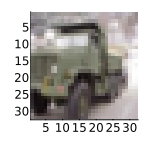

In [44]:
classes = (
    0 => "airplane",
    1 => "automobile",
    2 => "bird",
    3 => "cat",
    4 => "deer",
    5 => "dog",
    6 => "frog",
    7 => "horse",
    8 => "ship",
    9 => "truck"
)

index = rand(1:10000)

rand_test = test_x[:,:,:,[index]] 
rand_truth = test_y[index]
prediction = Flux.onecold(CNN_model(rand_test), 0:9)[1]

println("Predicted class: $(prediction) ($(classes[(prediction) + 1]))")
println("True class: $(rand_truth) ($(classes[(rand_truth) + 1]))")

img = test_x[:,:,:,index]
plot(image(img), size = (150,150))

In [43]:
accuracy(test_x, test_labels, CNN_model)

0.5183

# Example 3 - Inverse optimisation

Let's do something a bit more sophisticated now. Because of Julia's natural function oriented paradigm, we can treat trained NN as functions, and do things such as calculate *gradients*, which we can use in our favour!

Our task will be to try to train a NN that can learn the "shape" of an unknown function. We assume that all we have are inputs and evatuations of this function. 

In [45]:
# Styblinski–Tang function
f(x::Tuple) = 0.5 * sum([xi^4 - 16*xi^2 + 5*xi for xi in x])

num_samples = 1000
lb = Float32[-4.0, -4.0]
ub = Float32[0.0, 0.0]

T2M(x::Vector) = Float32.(reshape(collect(Iterators.flatten(x)), length(x[1]), length(x)))

x_tuple = Surrogates.sample(num_samples, [lb, ub]..., SobolSample())
x = T2M(x_tuple)
y = T2M(f.(x_tuple))

train_data, test_data = splitobs((x, y), at = 0.8) # from MLUtils.jl

# assign the data
x_train, y_train = train_data[1], train_data[2]
x_test, y_test = test_data[1], test_data[2];

Now that our data is in the format we need, let's set p and train a NN that learns the underlying relationship (i.e., function) between the inputs $x$ and outputs $y$. 

We start by building our model and setting its parameterisation

In [54]:
# build the model
surrogate_model = Chain(
    Dense(2, 512, relu),
    Dense(512, 256, relu),
    Dense(256, 1)
)

opt = Flux.setup(ADAM(), surrogate_model)                               # our optimiser
surrogate_loss(model, x, y) = Flux.mse(model(x), y)  # our loss

surrogate_loss (generic function with 1 method)

In [56]:
loss_progression = []
epochs = 2000

for epoch in 1:epochs
    Flux.train!(surrogate_loss, surrogate_model, [(x_train, y_train)], opt)
    # Logging
    l = surrogate_loss(surrogate_model, x_train, y_train)
    push!(loss_progression, l)
    if mod(epoch, 10) == 1 || epoch == epochs
        println("epoch=$epoch : train_loss=$l")
    end
end

epoch=1 : train_loss=2190.9639
epoch=11 : train_loss=1755.6313
epoch=21 : train_loss=1085.9025
epoch=31 : train_loss=344.08398
epoch=41 : train_loss=178.08873
epoch=51 : train_loss=174.85388
epoch=61 : train_loss=150.34587
epoch=71 : train_loss=148.96664
epoch=81 : train_loss=144.49207
epoch=91 : train_loss=143.55493
epoch=101 : train_loss=142.6184
epoch=111 : train_loss=141.91197
epoch=121 : train_loss=141.41203
epoch=131 : train_loss=140.91269
epoch=141 : train_loss=140.46652
epoch=151 : train_loss=140.01637
epoch=161 : train_loss=139.55148
epoch=171 : train_loss=139.05531
epoch=181 : train_loss=138.5044
epoch=191 : train_loss=137.88045
epoch=201 : train_loss=137.16753
epoch=211 : train_loss=136.36024
epoch=221 : train_loss=135.45097
epoch=231 : train_loss=134.43317
epoch=241 : train_loss=133.31683
epoch=251 : train_loss=132.12886
epoch=261 : train_loss=130.88136
epoch=271 : train_loss=129.5929
epoch=281 : train_loss=128.23428
epoch=291 : train_loss=126.86777
epoch=301 : train_loss=1

Let's have a look at our training loss

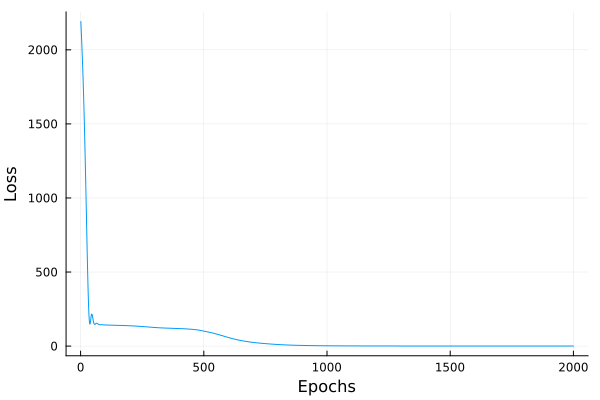

In [57]:
plot(1:epochs, loss_progression,
    xlabel = "Epochs",
    ylabel = "Loss",
    legend = false,
)

And make sure we check for overfitting

In [60]:
test_loss = surrogate_loss(surrogate_model, x_test, y_test)
println("Test Loss = $test_loss")

Test Loss = 0.29190952


Now we are ready to optimise our trained surrogate. Because `model()` can essentially be seen as a function, it also means that we can calculate gradients from it with respect to its inputs!

Let's implement a very simple gradient descent method for the task

In [61]:
x₀ = Float32.([0,0])  
max_iter = 100
θ = 0.01
trajectory = zeros(3, max_iter)

xₖ = x₀
for k =1:max_iter
    ∇ₖ = Flux.jacobian(x -> surrogate_model(x), xₖ)[1] # calculate gradient
    xₖ = xₖ .- θ .* ∇ₖ'
    trajectory[1:2,k] = xₖ
    trajectory[3,k] = surrogate_model(xₖ)[1]
    println("Iteration $k: f(xₖ)=$(surrogate_model(xₖ)[1])")
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 512, relu)  # 1_536 parameters
│   summary(x) = "2×1 Matrix{Float64}"
└ @ Flux ~/.julia/packages/Flux/uRn8o/src/layers/stateless.jl:60


Iteration 1: f(xₖ)=-2.4041116
Iteration 2: f(xₖ)=-2.7837105
Iteration 3: f(xₖ)=-3.0809267
Iteration 4: f(xₖ)=-3.2655795
Iteration 5: f(xₖ)=-3.363647
Iteration 6: f(xₖ)=-3.4223466
Iteration 7: f(xₖ)=-3.4656157
Iteration 8: f(xₖ)=-3.4862928
Iteration 9: f(xₖ)=-3.4972289
Iteration 10: f(xₖ)=-3.5045485
Iteration 11: f(xₖ)=-3.5101557
Iteration 12: f(xₖ)=-3.5154881
Iteration 13: f(xₖ)=-3.5192273
Iteration 14: f(xₖ)=-3.5212636
Iteration 15: f(xₖ)=-3.523045
Iteration 16: f(xₖ)=-3.5240507
Iteration 17: f(xₖ)=-3.52453
Iteration 18: f(xₖ)=-3.524856
Iteration 19: f(xₖ)=-3.5251796
Iteration 20: f(xₖ)=-3.525503
Iteration 21: f(xₖ)=-3.5258307
Iteration 22: f(xₖ)=-3.5261614
Iteration 23: f(xₖ)=-3.5264804
Iteration 24: f(xₖ)=-3.5268066
Iteration 25: f(xₖ)=-3.527133
Iteration 26: f(xₖ)=-3.5274515
Iteration 27: f(xₖ)=-3.5277622
Iteration 28: f(xₖ)=-3.5279524
Iteration 29: f(xₖ)=-3.5281026
Iteration 30: f(xₖ)=-3.5282037
Iteration 31: f(xₖ)=-3.5282845
Iteration 32: f(xₖ)=-3.5283508
Iteration 33: f(xₖ)=-3.5

We can see what was the final optimal point and compare against the ground truth, for validation

In [65]:
BSON.@save "surrogate_model.bson" surrogate_model

In [66]:
BSON.@load "surrogate_model.bson" surrogate_model

In [62]:
println("Final optimised position: [$(round(xₖ[1], digits=4)), $(round(xₖ[2], digits=4))]")
println("            Model Output: $(round(surrogate_model(xₖ)[1], digits=4))")
println("  Actual Function Output: $(round(f(Tuple(xₖ)), digits=4))")

Final optimised position: [0.2416, 0.3217]
            Model Output: -3.5297
  Actual Function Output: 0.1202


Let us visualise how well we are doing

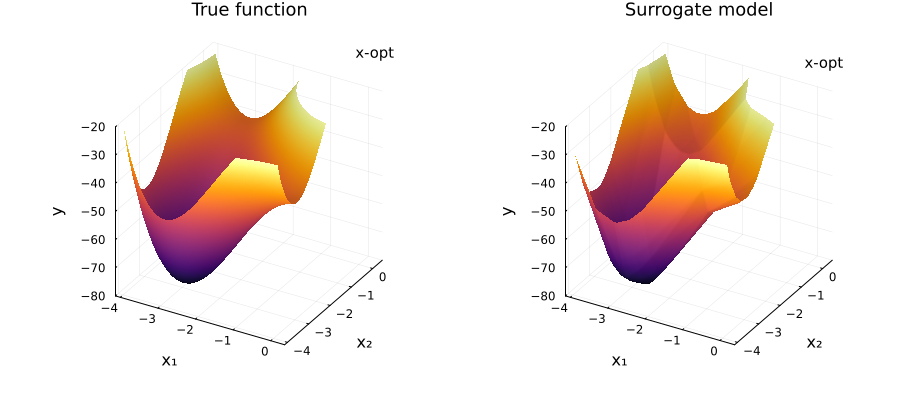

In [63]:
x, y = Float32.(-4.0:0.02:0.0), Float32.(-4.0:0.02:0.0) # To use model() we need Float32
z_true = [f((x1,x2)) for x1 in x, x2 in y]
z_surrogate = [surrogate_model([x1, x2])[1] for x1 in x, x2 in y] 

p1 = surface(x, y, z_true, clims = (-80, -20), colorbar = false)
scatter!(p1, [xₖ[1]], [xₖ[2]], [f(Tuple(xₖ))], legend = false)
annotate!(p1, [(xₖ[1], xₖ[2], f(Tuple(xₖ))-6, text("x-opt", 10))])

p2 = surface(x, y, z_surrogate, clims = (-80, -20), colorbar = false)
scatter!(p2, trajectory[1,:], trajectory[2,:], trajectory[3,:], legend = false)
scatter!(p2, [xₖ[1]], [xₖ[2]], [surrogate_model(xₖ)[1]], legend = false)
annotate!(p2, [(xₖ[1], xₖ[2], surrogate_model(xₖ)[1]-6, text("x-opt", :10))])

plot(p1, p2, 
    title=["True function" "Surrogate model"], 
    titlefontsize = 12,
    zlims = (-80, -20),
    xlabel = ["x₁" "x₁"], ylabel = ["x₂" "x₂"],
    zlabel = ["y" "y"],
    layout=(1,2), 
    size=(900, 400)
)

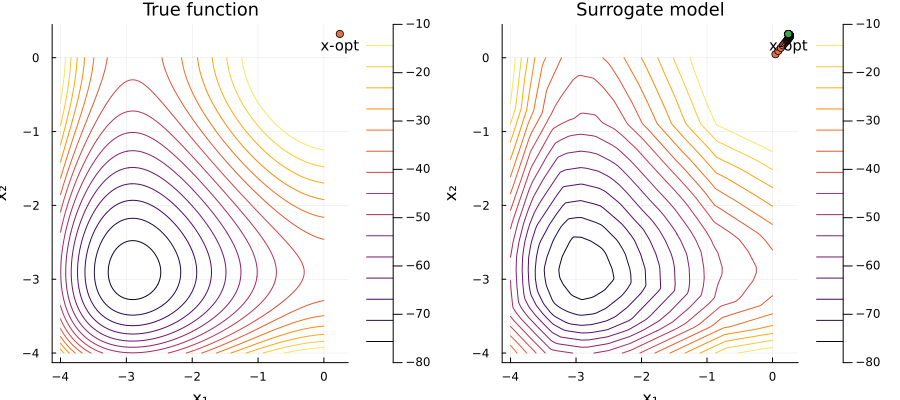

In [64]:
p1 = contour(x, y, z_true, clims = (-80, -10))
scatter!(p1, [xₖ[1]], [xₖ[2]], legend = false)
annotate!(p1, [(xₖ[1], xₖ[2]-0.15, text("x-opt", 10))])

p2 = contour(x, y, z_surrogate, clims = (-80, -10))
scatter!(p2, trajectory[1,:], trajectory[2,:], legend = false)
scatter!(p2, [xₖ[1]], [xₖ[2]], legend = false)
annotate!(p2, [(xₖ[1], xₖ[2]-0.15, text("x-opt", 10))])

plot(p1, p2, 
    title=["True function" "Surrogate model"],
    titlefontsize = 12, 
    xlabel = ["x₁" "x₁"], ylabel = ["x₂" "x₂"],
    layout=(1,2), 
    size=(900, 400),
)